# Sprawozdanie z laboratorium 3 i 4

## Przedmiotem eksperymetu
Zadaniem było wykonianie trzech programów, które na podstawie algorytmów klastrowania będą w stanie wywnioskować typ irysa. 
W zadaniu zostały użyte dwa popularne algorytmy 
1. DBSCAN - Density-based spatial clustering of applications with noise
2. KMeans - k-means clustering
Oba algorytmy zalicząją się do technik nauczania nienadzorowanego.

## Zadania
### Pierwsze 
Zadanie pierwsze polegało na zwizualizowaniau danych "skompresowanych" dzięki PCA. Oraz użycie na wcześniej wspomnianiaych danych algorytmu KMeans. 

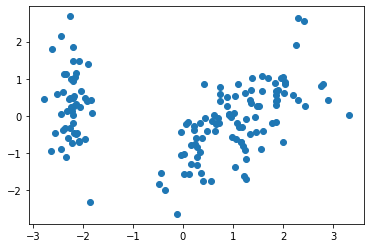

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("iris2D.csv")

coordinates = df.loc[:, ["PC1", "PC2"]]

plt.scatter(df.loc[:, "PC1"], df.loc[:, "PC2"])
plt.show()


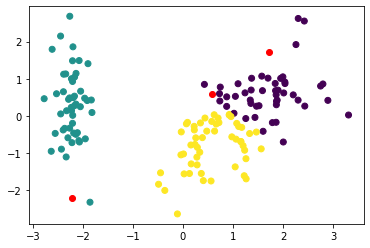

In [2]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(coordinates)
centroides = kmeans.cluster_centers_

plt.scatter(x=coordinates["PC1"],
            y=coordinates["PC2"],
            c=kmeans.labels_)
plt.scatter(x=centroides[:, 0],
            y=centroides[:, :1],
            c="red")
plt.show()

### Drugie
Drugie zadanie polegało właściwie na tym samym co pierwsze, z wyłączniem użytego algorytmu. Tym razem do grupowanai posłużył DBSCAN
#### Wyjaśnienie na czym polega DBSCAN
DBSCAN wymaga tylko dwóch parametrów: epsilon i minPunkty. Epsilon jest promieniem okręgu, który ma zostać utworzony wokół każdego punktu danych w celu sprawdzenia gęstości i minPunkty jest minimalną liczbą punktów danych wymaganych w tym okręgu, aby ten punkt danych mógł zostać sklasyfikowany jako a rdzeń punkt.

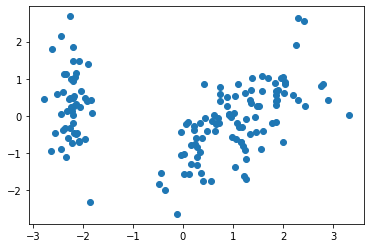

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

df = pd.read_csv("iris2D.csv")
coordinates = df.loc[:, ["PC1", "PC2"]]

plt.scatter(df.loc[:, "PC1"], df.loc[:, "PC2"])
plt.show()

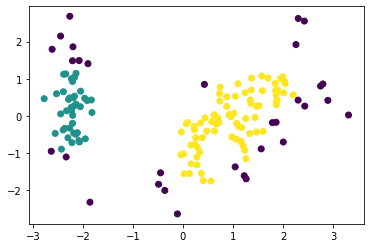

In [7]:
dbscan = DBSCAN(eps=.33)
clusters = dbscan.fit_predict(coordinates)

plt.scatter(x=coordinates["PC1"],
            y=coordinates["PC2"],
            c=dbscan.labels_)
plt.show()

### Trzecie
W ostatnim zadaniu polecenie polegało na budowie tzw. tabeli krzyżowej i sprawdzeniu "czystości" obu algorytmów. 

In [8]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics.cluster import contingency_matrix, adjusted_rand_score
import numpy as np

df = pd.read_csv("irisORG.csv")
X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]

In [9]:
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(X)
cont_m = contingency_matrix(y_pred, Y)

puirty = np.sum(np.max(cont_m, axis=1))/np.sum(cont_m)
rand_score = adjusted_rand_score(list(y_pred), list(Y.iloc[:, 0]))
print("puirty:"+str(puirty))
print("rand_score:"+str(rand_score))


puirty:0.8933333333333333
rand_score:0.7302382722834697


In [10]:
dbscan = DBSCAN(eps=.33)
y_pred = dbscan.fit_predict(X)
cont_m = contingency_matrix(y_pred, Y)

puirty = np.sum(np.max(cont_m, axis=1))/np.sum(cont_m)
rand_score = adjusted_rand_score(list(y_pred), list(Y.iloc[:, 0]))
print("puirty:"+str(puirty))
print("rand_score:"+str(rand_score))

puirty:0.76
rand_score:0.3457268779518477
